In [4]:
from MonteCarlo import MonteCarlo
from copy import deepcopy
class SARSA(MonteCarlo):
    def __init__(self,env,discount=1, epsilon=0,alpha = 0):
        super().__init__(env,discount,epsilon)
        
        self._alpha = alpha
        
    def _update_q_values(self,scenario,loc,action):
        """ update current qs """
        old_q = self._q_values[scenario][tuple(loc)][action]
        
        loc_1, r =  self._env._check_action_reward(action,loc)
        
        action_1 = self._get_next_action(scenario,tuple(loc_1))
        
        loc_2, r_1 =  self._env._check_action_reward(action_1,loc_1)
        
        q_1 = self._q_values[scenario][tuple(loc_1)][action_1]
        
        new_q = old_q + (r_1 + self._alpha * q_1 - old_q)
        
        self._q_values[scenario][tuple(loc)][action] = new_q
    
    def _run_episode(self):
        """ run episode once """
        self.loc_record = []
        self.reward_record = []
        self.action_record = []
        self._terminal_status = False
        
        self._env._player = self._all_states[0][0] # player start loc
        while not self._terminal_status :
            scenario = self._check_scenario()
            loc = self._env._player
            self.loc_record.append(loc)
            
            action = self._get_next_action(scenario,tuple(loc))
            self.action_record.append([scenario,loc,action])
            
            # update q value
            self._update_q_values(scenario,loc,action)                                                            
                        
            loc_1 = self._apply_action(action,loc)
            self._env._player = loc_1
            
            r = self._env._check_reward(loc_1)
            self.reward_record.append(r)

#             self.render()
            
#         print("steps taken:",len(self.loc_record))
            

    def run_algorithm(self,num_episode = 1):
        
        self._env.reset()
        self._env._star = deepcopy(self._star)
        self._init_all_states()
        self._init_q_values()
        self._init_action_count()

        
        for i in range(num_episode):
            self._env._star = deepcopy(self._star)
            self._run_episode()

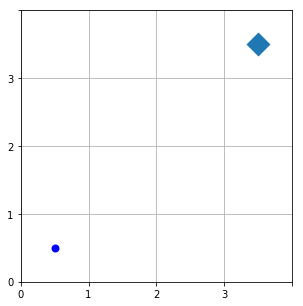

In [5]:
from MazeEnv import MazeGen
%matplotlib inline

maze = MazeGen(4,4)
maze.render()

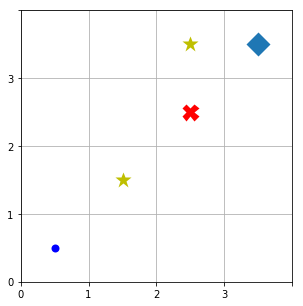

In [6]:
maze.set_grid(star=[1,1])
maze.set_grid(star=[2,3])
maze.set_grid(trap=[2,2])
alg = SARSA(maze,discount = 0.9,epsilon=0.1,alpha = 0.9)
alg.render()

In [7]:
alg.run_algorithm(100)

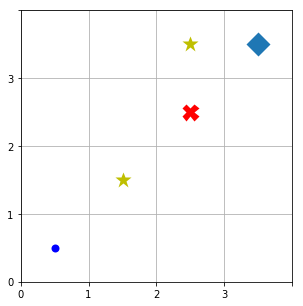

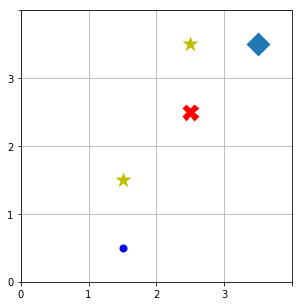

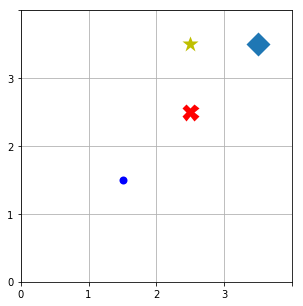

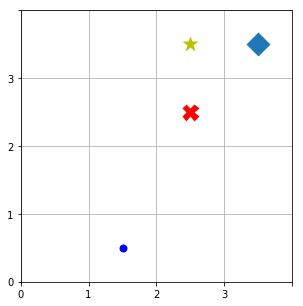

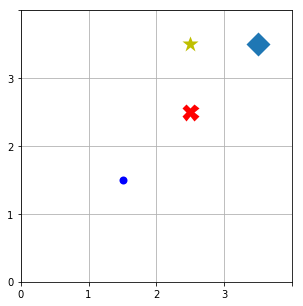

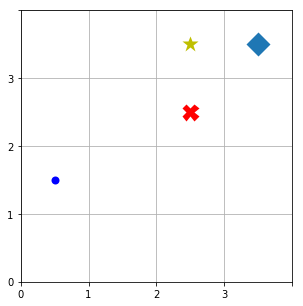

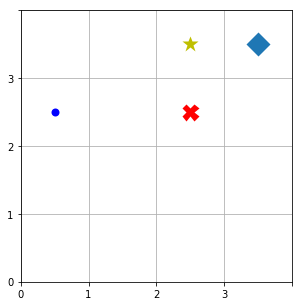

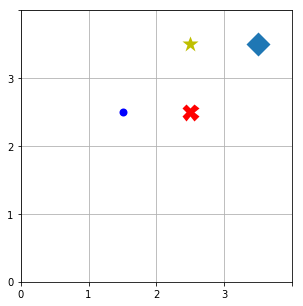

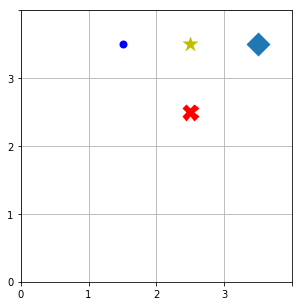

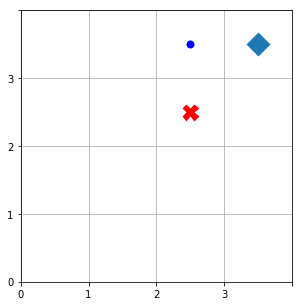

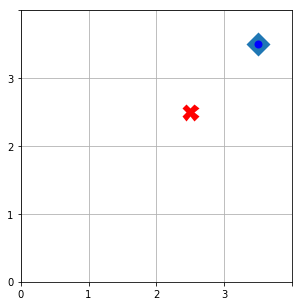

In [8]:
alg.plot_last_episode()